In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

In [5]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
data.shape

(200, 4)

In [9]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# exploratory data analysis

<AxesSubplot:xlabel='Sales', ylabel='Count'>

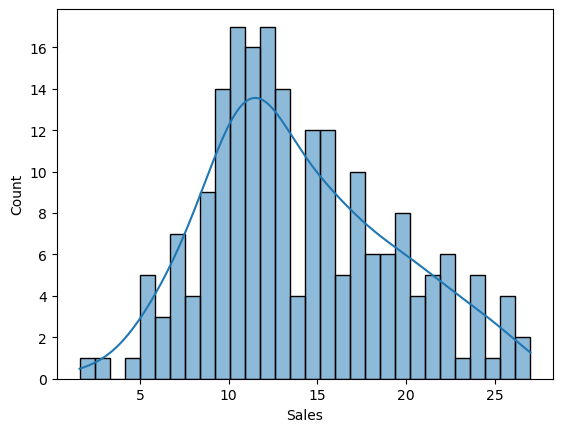

In [14]:
sns.histplot(data['Sales'],bins=30, kde=True)

<AxesSubplot:xlabel='TV', ylabel='Count'>

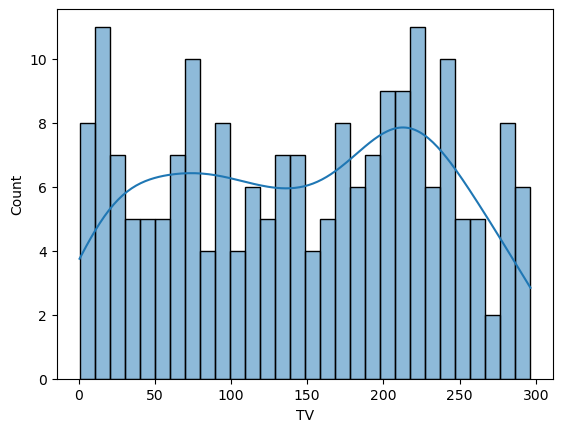

In [15]:
sns.histplot(data['TV'],bins=30, kde=True)

<AxesSubplot:xlabel='Radio', ylabel='Count'>

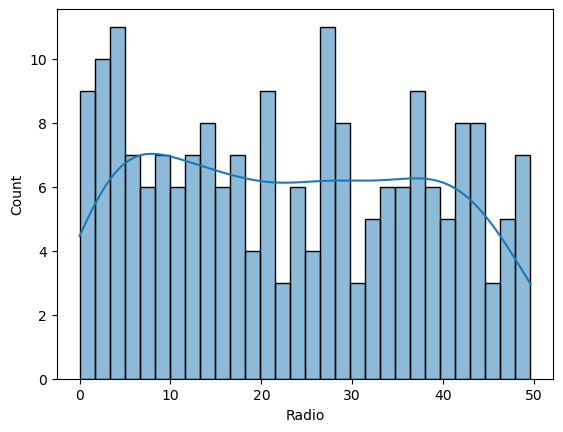

In [16]:
sns.histplot(data['Radio'],bins=30, kde=True)

<AxesSubplot:xlabel='Newspaper', ylabel='Count'>

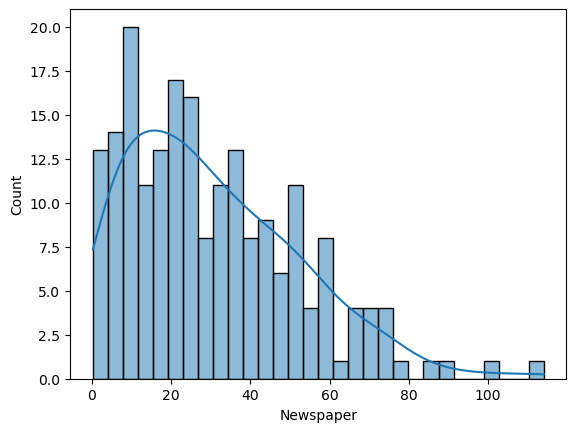

In [17]:
sns.histplot(data['Newspaper'],bins=30, kde=True)

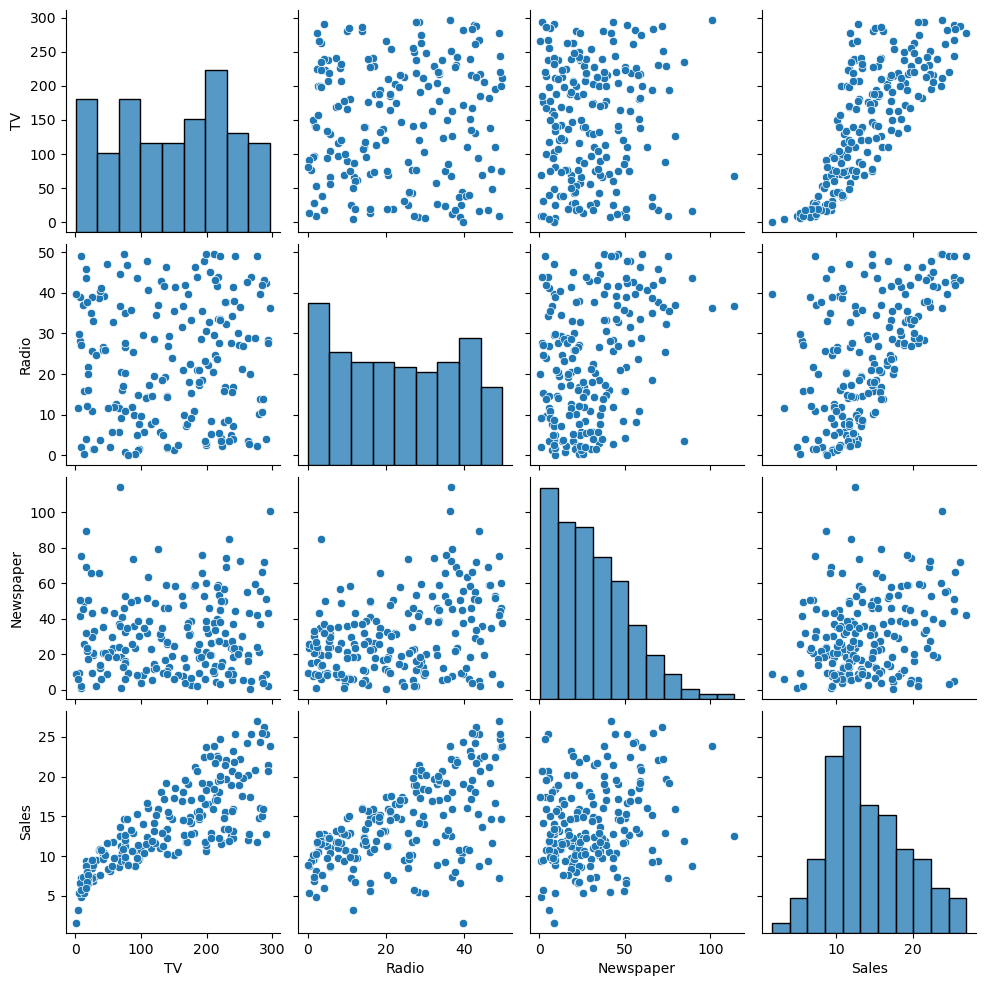

In [18]:
sns.pairplot(data)

<AxesSubplot:>

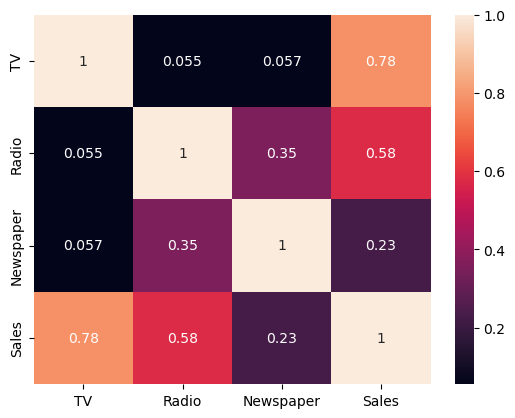

In [19]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

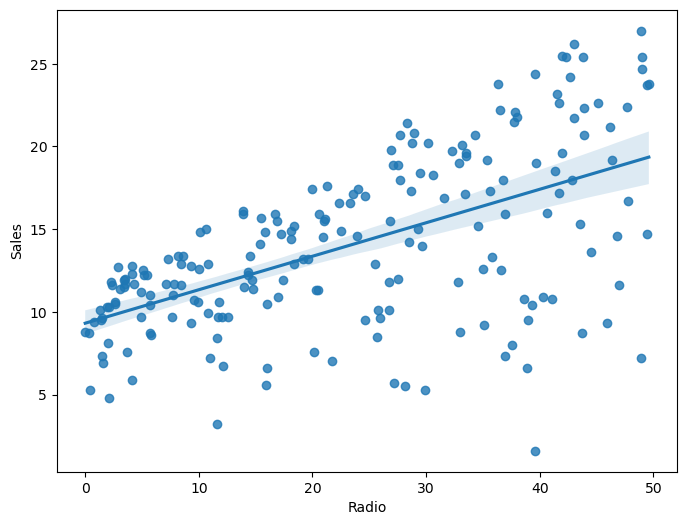

In [24]:
plt.figure(figsize=(8,6))
sns.regplot(x='Radio',y='Sales',data=data)

<AxesSubplot:xlabel='TV', ylabel='Sales'>

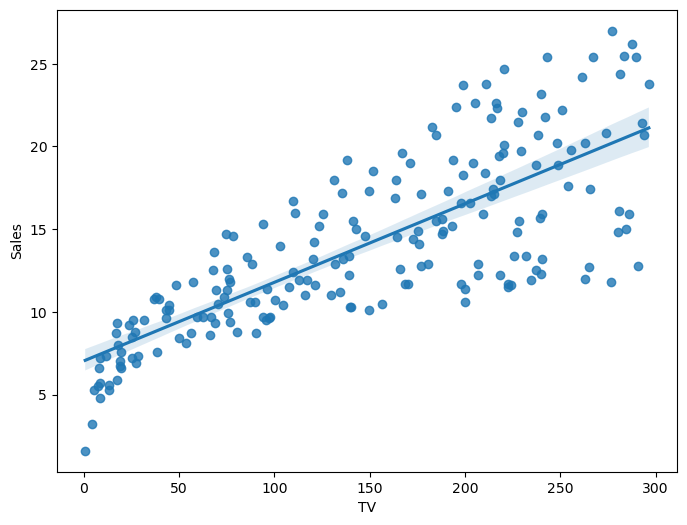

In [22]:
plt.figure(figsize=(8,6))
sns.regplot(x='TV',y='Sales',data=data)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

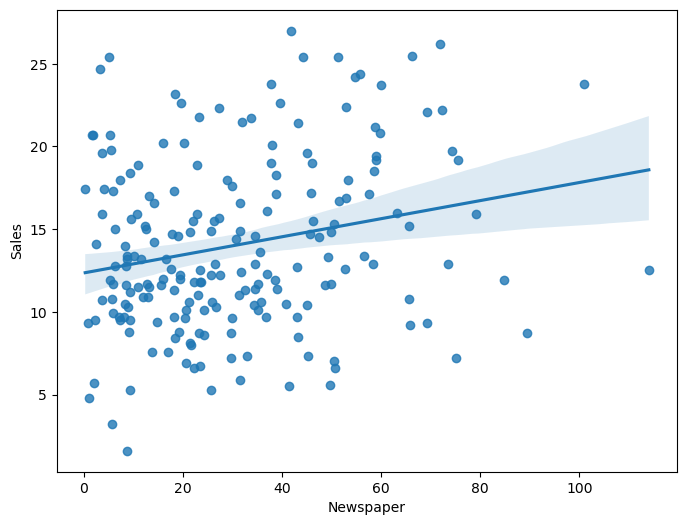

In [20]:
plt.figure(figsize=(8,6))
sns.regplot(x='Newspaper',y='Sales',data=df)

# model fitting

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [43]:
x=data.iloc[:,0:3]
y=data['Sales']

In [45]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [46]:
y.shape

(200,)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [48]:
x_train

,TV,Radio,Newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [50]:
y_test.shape

(60,)

In [51]:
y_train.shape

(140,)

In [52]:
model1=LinearRegression()

In [53]:
model1.fit(x_train,y_train)

LinearRegression()

In [60]:
y_pred=model1.predict(x_test)

In [61]:
print("Intercept of the model is",model1.intercept_)

Intercept of the model is 2.70894909251591


In [62]:
model1.score(x_train,y_train)

0.9055159502227753

In [63]:
model1.score(x_test,y_test)

0.8609466508230368

In [64]:
from sklearn.metrics import r2_score
print(f''' The train accuracy : {r2_score(y_train,model1.predict(x_train))}
The test accuracy : {r2_score(y_test , y_pred)}''')

 The train accuracy : 0.9055159502227753
The test accuracy : 0.8609466508230368


In [77]:
for idx,col_name in enumerate(x_train.columns):
    print("The coeffient of {0} is {1}".format(col_name,model1.coef_[idx]))

The coeffient of TV is 0.0440592809574652
The coeffient of Radio is 0.19928749689893954
The coeffient of Newspaper is 0.006882452222275456


In [71]:
model2= RandomForestRegressor(n_estimators=50)


In [72]:
model2.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50)

In [73]:
model2.score(x_train,y_train)

0.996136964397345

In [74]:
model2.score(x_test,y_test)

0.9838996726132616

In [75]:
y_pred1=model2.predict(x_test)

In [76]:
print(f''' The train accuracy : {r2_score(y_train,model2.predict(x_train))}
The test accuracy : {r2_score(y_test , y_pred1)}''')

 The train accuracy : 0.996136964397345
The test accuracy : 0.9838996726132616
